# Modeling
This notebook contains the modeling code for asthma, and predicting asthma from smoke

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

## Loading the Data

In [6]:
smoke_cleaned = pd.read_csv('../data_clean/norman_wildfires_SI_yearly_average.csv')

yearly_smoke_estimate_df = smoke_cleaned[['Year', 'Smoke_Estimate']]
yearly_smoke_estimate_df.set_index('Year', inplace=True)


asthma_survey_cleaned = pd.read_csv('../data_clean/asthma_survey_cleaned.csv')

yearly_asthma_df = asthma_survey_cleaned[['Year', 'Percentage']]
yearly_asthma_df.set_index('Year', inplace=True)

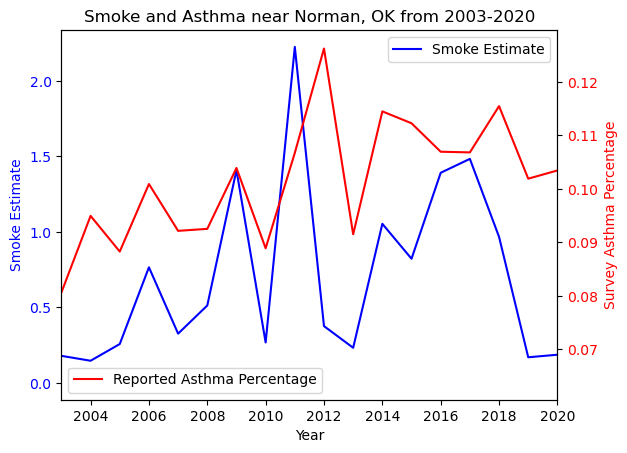

In [32]:
# Define subplots so we can plot on top of each other
fig, ax_si = plt.subplots()

#Plot the smoke estimate
ax_si.plot(smoke_cleaned['Year'].astype(int), smoke_cleaned['Smoke_Estimate'], color='blue', label='Smoke Estimate')
ax_si.set_xlabel("Year")
ax_si.set_ylabel("Smoke Estimate", color='blue')
ax_si.tick_params(axis="y", labelcolor="blue")
ax_si.legend()

# Plot the AQI estimate
ax_aqi = ax_si.twinx()
ax_aqi.plot(asthma_survey_cleaned['Year'].astype(int), asthma_survey_cleaned['Percentage'], color='red', label='Reported Asthma Percentage')
ax_aqi.set_ylabel("Survey Asthma Percentage", color='red')
ax_aqi.tick_params(axis="y", labelcolor="red")
ax_aqi.legend()

plt.xlim([2003, 2020])
plt.title("Smoke and Asthma near Norman, OK from 2003-2020")
plt.show()

Spearman Correlation Coefficient: 0.6078431372549019
P-value: 0.007450054518883103


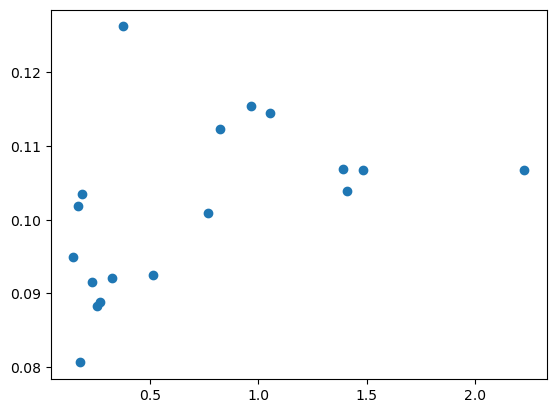

In [39]:
smoke_cleaned_02_20 = smoke_cleaned[smoke_cleaned['Year'].between(2003, 2020)]
asthma_survey_cleaned_02_20 = asthma_survey_cleaned[asthma_survey_cleaned['Year'].between(2003, 2020)]

# Convert to numpy and normalize feature vector
smoke = np.array(smoke_cleaned_02_20['Smoke_Estimate'])
asthma = np.array(asthma_survey_cleaned_02_20['Percentage'])

# def normalize(array):
#     return (array - np.mean(array)) / (np.std(array))

# smoke_norm = normalize(smoke)
# asthma_norm = normalize(asthma)

plt.scatter(smoke, asthma)

corr, p_value = spearmanr(smoke, asthma)

print("Spearman Correlation Coefficient:", corr)
print("P-value:", p_value)